# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_cad_data = requests.get(btc_url)
btc_cad_json = btc_cad_data.json()
btc_cad = btc_cad_json['data']['1']['quotes']['CAD']['price']

# Fetch current ETH price
eth_cad_data = requests.get(eth_url)
eth_cad_json = eth_cad_data.json()
eth_cad = eth_cad_json['data']['1027']['quotes']['CAD']['price']

# Compute current value of my crpto
my_btc_value = my_btc*btc_cad
my_eth_value = my_eth*eth_cad

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $45997.72
The current value of your 5.3 ETH is $12995.80


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [8]:
# Format current date as ISO format
today = pd.Timestamp("2023-03-21", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_shares_data = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Reorganize the DataFrame
# Separate ticker data
agg_data = df_shares_data[df_shares_data['symbol']=="AGG"].drop('symbol', axis=1)
spy_data = df_shares_data[df_shares_data['symbol']=="SPY"].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_shares_data = pd.concat([agg_data, spy_data], axis=1, keys=['AGG', 'SPY'])

# Preview DataFrame
df_shares_data.head()

AGG                                          \
                            open   high   low close   volume trade_count   
timestamp                                                                  
2023-03-21 04:00:00+00:00  98.85  99.03  98.7  98.8  5266174       24207   

                                         SPY                          \
                                vwap    open    high     low   close   
timestamp                                                              
2023-03-21 04:00:00+00:00  98.828502  397.24  399.41  395.58  398.91   

                                                             
                             volume trade_count        vwap  
timestamp                                                    
2023-03-21 04:00:00+00:00  89398619      612729  397.090074

In [9]:
# Pick AGG and SPY close prices
agg_close_price = df_shares_data['AGG']['close']
spy_close_price = df_shares_data['SPY']['close']

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $timestamp
2023-03-21 04:00:00+00:00    98.8
Name: close, dtype: float64
Current SPY closing price: $timestamp
2023-03-21 04:00:00+00:00    398.91
Name: close, dtype: float64


In [10]:
# Compute the current value of shares
my_agg_value = my_agg*agg_close_price[0]
my_spy_value = my_spy*spy_close_price[0]

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19945.50
The current value of your 200 AGG shares is $19760.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto = my_btc_value+my_eth_value
shares = my_agg_value+my_spy_value

# Create savings DataFrame
df_savings = pd.DataFrame({'amount':[crypto, shares]}, index=['crypto', 'shares'])

# Display savings DataFrame
display(df_savings)

,amount
crypto,58993.525448
shares,39705.500000


array([<AxesSubplot:ylabel='amount'>], dtype=object)

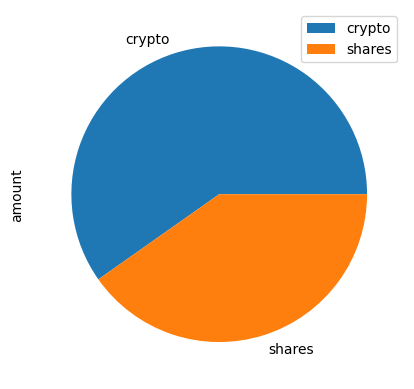

In [12]:
# Plot savings pie chart
df_savings.plot.pie(legend=True, subplots=True)

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto+shares

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough savings in this fund for an emergency situation.")
elif total_savings == emergency_fund:
    print("Congratulations on reaching your emergency savings goal!")
else:
    print(f"You are ${emergency_fund-total_savings} away from reaching your emergency savings goal.")

Congratulations! You have enough savings in this fund for an emergency situation.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2018-03-21', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-03-21', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Reorganize the DataFrame
# Separate ticker data
agg_historical_data = df_stock_data[df_stock_data['symbol']=="AGG"].drop('symbol', axis=1)
spy_historical_data = df_stock_data[df_stock_data['symbol']=="SPY"].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([agg_historical_data, spy_historical_data], axis=1, keys=['AGG', 'SPY'])

# Display sample data
df_stock_data.head()

AGG                                   \
                             open    high     low   close   volume   
timestamp                                                            
2018-03-21 04:00:00+00:00  106.32  106.48  106.08  106.41  2994423   
2018-03-22 04:00:00+00:00  106.67  106.80  106.49  106.61  3334408   
2018-03-23 04:00:00+00:00  106.46  106.70  106.46  106.61  3618720   
2018-03-26 04:00:00+00:00  106.64  106.71  106.47  106.57  4546535   
2018-03-27 04:00:00+00:00  106.63  106.95  106.61  106.88  4566884   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2018-03-21 04:00:00+00:00       13898  106.284005  270.90  273.27  270.19   
2018-03-22 04:00:00+00:00       13773  106.616043  267.91  268.87  263.36   
2018-03-23 04:00:00+00:00       11823  106.607241  264.17  265.02  257.83   
2018-03-26 04:00:00+00:00       19722  106.583861  262.13  265.43  259.41   
2018-03-27 04:00:00+00:00       14293  106.826049  266.17  266.77  258.84   

                                                                       
                             close     volume trade_count        vwap  
timestamp                                                              
2018-03-21 04:00:00+00:00  270.400   78884438      330625  271.404380  
2018-03-22 04:00:00+00:00  263.710  149493729      577825  266.129101  
2018-03-23 04:00:00+00:00  258.015  183856351      624778  261.280967  
2018-03-26 04:00:00+00:00  265.140  143141239      450168  262.353110  
2018-03-27 04:00:00+00:00  260.760  130806695      538201  263.145788

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
num_sims = 500
num_days = 252*30
weights = [0.4, 0.6]

mc_stocks = MCSimulation(
    portfolio_data=df_stock_data,
    weights=weights,
    num_simulation=num_sims,
    num_trading_days=num_days
)

In [17]:
# Printing the simulation input data
print(f"Portfolio sample data: {df_stock_data.head()}")
print(f"Bonds/stocks weighting: {weights[0]*100}%/{weights[1]*100}%")
print(f"Number of simulations: {num_sims}")
print(f"Number of trading days: {num_days}")

Portfolio sample data:                               AGG                                   \
                             open    high     low   close   volume   
timestamp                                                            
2018-03-21 04:00:00+00:00  106.32  106.48  106.08  106.41  2994423   
2018-03-22 04:00:00+00:00  106.67  106.80  106.49  106.61  3334408   
2018-03-23 04:00:00+00:00  106.46  106.70  106.46  106.61  3618720   
2018-03-26 04:00:00+00:00  106.64  106.71  106.47  106.57  4546535   
2018-03-27 04:00:00+00:00  106.63  106.95  106.61  106.88  4566884   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2018-03-21 04:00:00+00:00       13898  106.284005  270.90  273.27  270.19   
2018-03-22 04:00:00+00:00       13773  106.616043  267.91  268.87  263.36   
2018-03-23 04:00:00+00:00      

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
mc_stocks.calc_cumulative_return() 

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Julian\Documents\FinTech\Module 5\apis-homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.991095,0.996821,1.004636,1.000575,1.000541,1.013570,0.998386,1.004911,0.980486,1.008809,...,0.989702,0.996380,1.002441,1.011306,1.000463,1.000070,0.988179,1.005457,0.988617,1.008025
2,1.002290,1.004585,0.995980,0.996396,1.008060,1.016334,0.980063,1.014441,0.971947,1.002907,...,0.991677,0.989873,1.006190,1.010371,1.000089,0.985243,0.992533,1.007912,0.978022,1.012709
3,1.012869,1.011139,1.000274,0.986894,1.019347,1.012752,0.982670,1.018392,0.970723,1.003198,...,0.984437,0.980756,0.999700,1.018883,0.998746,0.983541,0.997428,1.004817,0.964068,1.015435
4,1.003640,0.999975,0.996645,0.987468,1.035964,1.015698,0.962971,1.014315,0.964877,1.008090,...,0.988594,0.976604,1.002309,1.009090,1.010018,0.989202,0.987735,1.006180,0.953876,1.013273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,10.109443,1.613519,3.286875,3.274323,1.137542,2.736677,4.096071,3.022520,1.938097,4.054040,...,2.332467,2.146112,2.137321,5.356930,1.243602,1.516891,3.940380,2.278932,3.330259,1.913283
7557,10.314060,1.609246,3.275791,3.248253,1.135972,2.744014,4.064945,3.000301,1.899822,4.041139,...,2.348284,2.164969,2.129535,5.253454,1.233722,1.525025,3.926255,2.268431,3.352998,1.878695
7558,10.347645,1.617235,3.310731,3.324968,1.130984,2.743074,4.097113,3.008259,1.909761,4.076447,...,2.325623,2.205142,2.130557,5.219098,1.252032,1.512747,3.959528,2.237125,3.343580,1.901491
7559,10.457679,1.582933,3.312761,3.269069,1.114892,2.763055,4.127885,3.008895,1.914034,4.046549,...,2.346657,2.192026,2.126358,5.210172,1.245752,1.503670,3.982151,2.251523,3.310146,1.909561


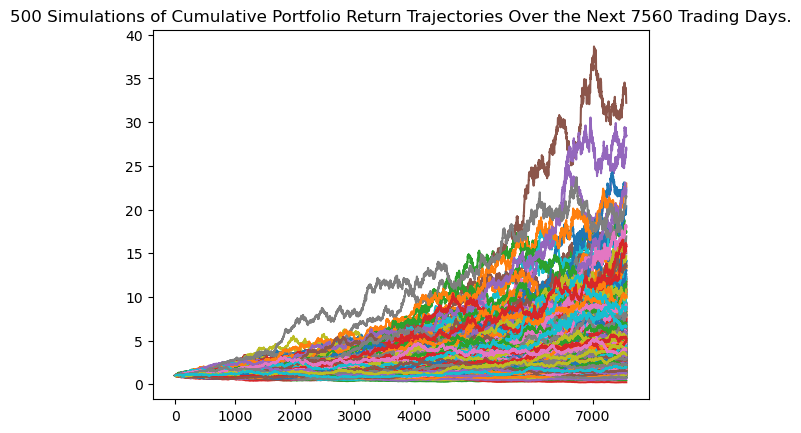

In [19]:
# Plot simulation outcomes
sim_line_plot = mc_stocks.plot_simulation()

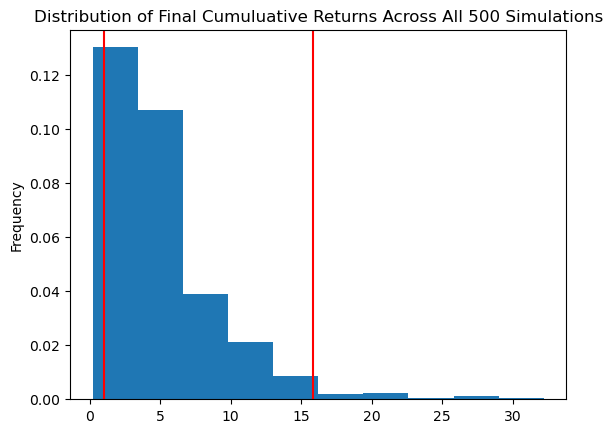

In [20]:
# Plot probability distribution and confidence intervals
sim_dist_plot = mc_stocks.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
sim_summary_stats = mc_stocks.summarize_cumulative_return()

# Print summary statistics
print(sim_summary_stats)

count           500.000000
mean              5.144293
std               4.176545
min               0.228191
25%               2.350809
50%               3.939705
75%               6.499517
max              32.207854
95% CI Lower      1.006188
95% CI Upper     15.853679
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(sim_summary_stats[8]*initial_investment, 2)
ci_upper = round(sim_summary_stats[9]*initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $20123.77 and $317073.57


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(sim_summary_stats[8]*initial_investment, 2)
ci_upper = round(sim_summary_stats[9]*initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $30185.65 and $475610.36


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [26]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [27]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [29]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

NameError: name 'ci_lower_five' is not defined

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")